## Домашнее задание к лекции «Задачи классификации и кластеризации»

1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn) 
2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety 
3. Разделите данные на выборку для обучения и тестирования 
4. Постройте модель LDA 
5. Визуализируйте предсказания для тестовой выборки и центры классов 
6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width 
7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [37]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

## 1. берем датасет

In [38]:
iris = load_iris()

In [61]:
# загружаем данные в датафрейм
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = data_class #iris.target
data['name'] = data.target.apply(lambda x : iris.target_names[x])
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


## 2. оставляем два признака - sepal_length и sepal_width и целевую переменную - variety 

In [62]:
df = data[['sepal length (cm)','sepal width (cm)','target']].copy()
df

,sepal length (cm),sepal width (cm),target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


## 3. разделяем данные на выборку для обучения и тестирования 

In [41]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

In [63]:
X = df[['sepal length (cm)', 'sepal width (cm)']]
y = data_class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## 4. построим модель LDA

In [64]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [65]:
lda = LinearDiscriminantAnalysis()

In [66]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [68]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 1, 1, 2, 0,
       0])

In [69]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [74]:
result

,0,1
0,1,1
1,0,0
2,2,2
3,1,1
4,1,2
5,0,0
6,1,1
7,2,2
8,1,1
9,1,1


In [71]:
# расчет точности - отношение верный прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов 
#(наблюдений в категориях примерно одинаковое количество)

from sklearn.metrics import accuracy_score

In [72]:
accuracy_score(y_test, lda.predict(X_test))

0.8444444444444444

## 5. визуализируем предсказания для тестовой выборки и центры классов 

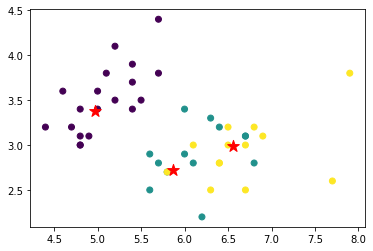

In [85]:
# посмотрим на наши центроиды
lda.means_
# визуализируем дискриминантную линию только по 2 признакам
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=y_test)
# центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')
plt.show()

## 6. отбросим целевую переменную и оставим только два признака - sepal_length и sepal_width 

In [88]:
df_drop = df.drop('target', axis=1).copy()
df_drop

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


## 7. подбираем оптимальное число кластеров для алгоритма kmeans и визуализируем полученную кластеризацию

In [89]:
from sklearn.cluster import KMeans

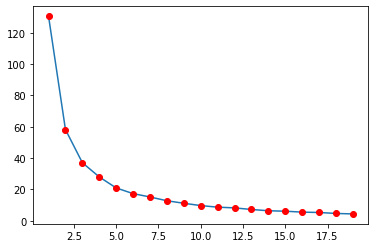

In [107]:
# строим график локтя
# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)
for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(df_drop)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [108]:
# считаю необходимым проверить кластеризацию от 1 до 6
range_ = range(1,6)

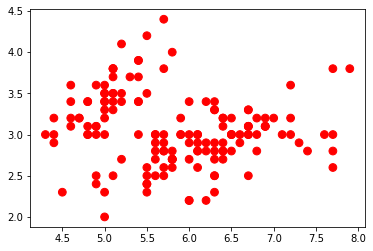

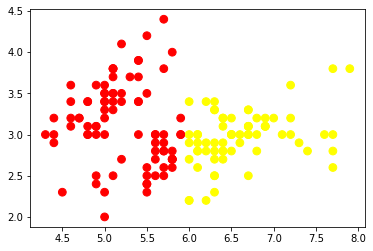

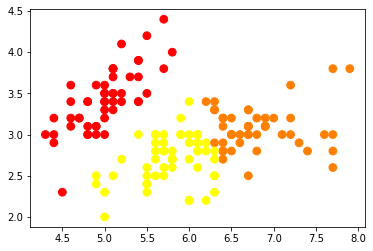

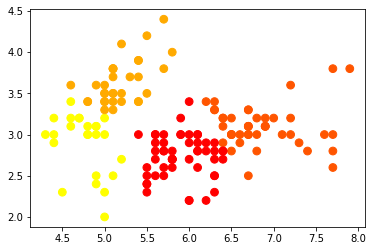

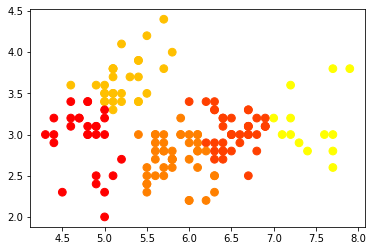

In [112]:
for i in range_:
    # явно указываем количество кластеров
    kmeans = KMeans(n_clusters=i)
    # fit_predict обучается на данных и каждому объекту присваивает кластер
    clusters = kmeans.fit_predict(df_drop)
    clusters
    plt.scatter(df_drop['sepal length (cm)'], df_drop['sepal width (cm)'], cmap='autumn', c=clusters, s=60)
    plt.show()

### по моему мнению самая визуально удачная кластеризация это деление на 3 кластера, 
### однако "алгоритмическое" деление на 3 выглядит выглядит "логичнее" чем "оригинальное"

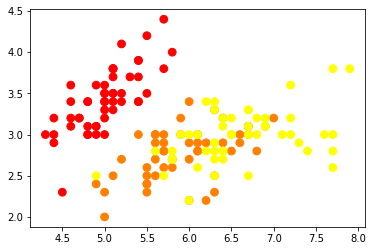

In [111]:
# привожу для примера "оригинальную" кластеризацию
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], cmap='autumn', c=df['target'], s=60)

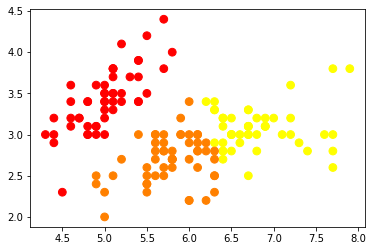

In [113]:
# привожу "алгоритмическое" деление на 3 кластера отдельно
kmeans = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(df_drop)
clusters
plt.scatter(df_drop['sepal length (cm)'], df_drop['sepal width (cm)'], cmap='autumn', c=clusters, s=60)
plt.show()